----
#**IMDb Rating Prediction Project with NLP:**
1. **Exploratory Data Analysis**
2. **Data Cleaning**

----

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/25k IMDb movie Dataset.csv'
df_raw = pd.read_csv(path)

In [ ]:
df_raw.head(5)

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,"$71,101,257",5.2,32K,"['Animation', 'Action', 'Adventure']",While spending years attempting to return home...,"['galaxy', 'spaceship', 'robot', 'rocket', 'sp...",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Ev...",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,not-released,5.4,23K,"['Action', 'Crime', 'Drama']","In the near future, convicts are offered the c...","['discover', 'medical', 'test', 'reality', 'fi...",Joseph Kosinski,"['Rhett Reese', 'Paul Wernick', 'Chris Hemswor...",George Saunders,-2022,/title/tt9783600/


In [ ]:
df_raw.tail(5)

,movie title,Run Time,Rating,User Rating,Generes,Overview,Plot Kyeword,Director,Top 5 Casts,Writer,year,path
24397,Delicatessen,"FRF 24,000,000 (estimated)",7.6,85K,"['Comedy', 'Crime']",Post-apocalyptic surrealist black comedy about...,"['surrealist', 'black comedy', 'human meat', '...",Marc Caro,"['Jean-Pierre Jeunet', 'Marc Caro', 'Gilles Ad...",Jean-Pierre Jeunet,-1991,/title/tt0101700/
24398,Bitch Ass,not-released,5.5,52,"['Crime', 'Horror']",A gang initiation goes wrong when a group of f...,[],Bill Posley,"['Bill Posley', 'Teon Kelley', 'Tunde Laleye',...",Jonathan Colomb,-2022,/title/tt13991504/
24399,Bullwhip,not-released,5.1,398,"['Crime', 'Romance', 'Western']","In order to avoid the hangman's noose, a cowbo...","['taming of the shrew', 'fur trader', 'busines...",Harmon Jones,"['Guy Madison', 'Rhonda Fleming', 'James Griff...",Adele Buffington,-1958,/title/tt0051438/
24400,The Freshman,1 hour 42 minutes,6.4,20K,"['Comedy', 'Crime']",An N.Y.C. film school student accepts a job wi...,"['endangered species', 'fish out of water', 'g...",Andrew Bergman,"['Marlon Brando', 'Matthew Broderick', 'Bruno ...",Andrew Bergman,-1990,/title/tt0099615/
24401,Guys and Dolls,"$5,500,000 (estimated)",7.1,18K,"['Comedy', 'Crime', 'Musical']","In New York, a gambler is challenged to take a...","['mission', 'gambler', 'new york city', 'based...",Joseph L. Mankiewicz,"['Abe Burrows', 'Damon Runyon', 'Marlon Brando...",Jo Swerling,-1955,/title/tt0048140/


----
#**Exploratory Data Analysis**

----
#Top Ten Movies By Rating

In [ ]:
df_topten_rating = df_raw[['movie title','Rating']]

In [ ]:
df_topten_rating['Rating'] = pd.to_numeric(df_topten_rating['Rating'], errors='coerce')

<ipython-input-25-c69f7cfa8309>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topten_rating['Rating'] = pd.to_numeric(df_topten_rating['Rating'], errors='coerce')


In [ ]:
df_topten_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 24401
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie title  21611 non-null  object 
 1   Rating       20638 non-null  float64
dtypes: float64(1), object(1)
memory usage: 506.5+ KB


In [ ]:
df_topten_rating.sort_values(by = 'Rating', ascending = False, inplace = True)

<ipython-input-27-53f0058fbd89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topten_rating.sort_values(by = 'Rating', ascending = False, inplace = True)


In [ ]:
df_topten_rating.isna().sum()

movie title      0
Rating         973
dtype: int64

In [ ]:
df_topten = df_topten_rating.head(10)

In [ ]:
df_topten

,movie title,Rating
4453,Pinpoint,9.9
6172,Memory Lane,9.9
24184,Vaaitha,9.8
4942,Son of Alibaba Nalpathonnaman,9.8
17787,Tutankhamun: Enter the Tomb,9.7
5004,I am not a terrorist,9.7
16872,Hello Jadoo: The Secret of Jeju Island,9.7
6152,Vaa Deal,9.7
2732,Bullet Proof,9.6
4734,Dheeran,9.6


#Bar Chart for Top Ten Movies by Rating

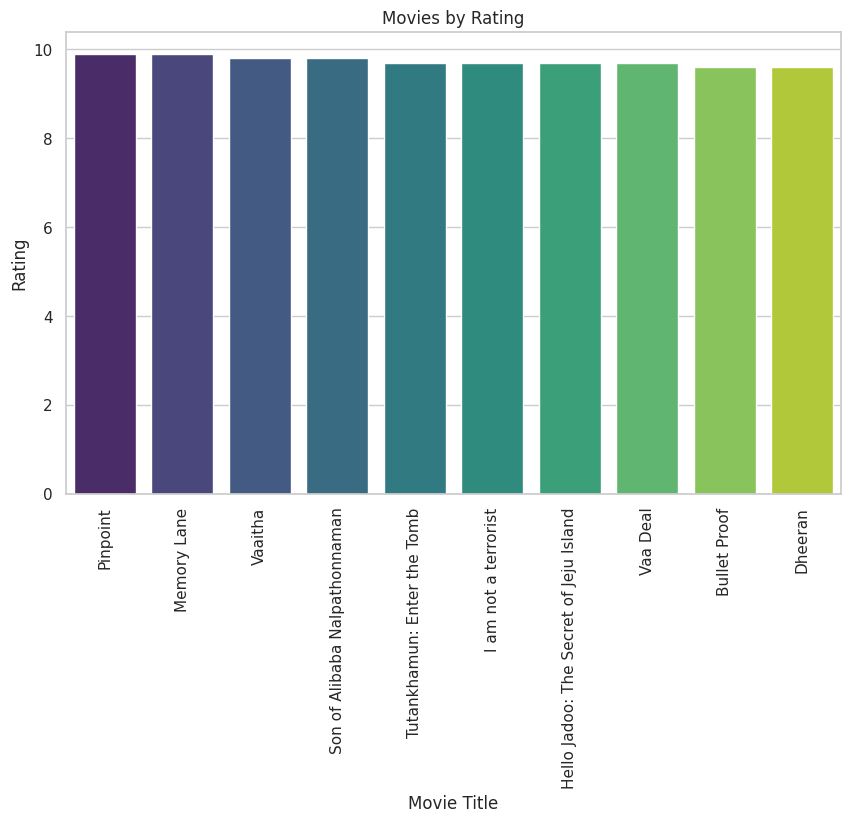

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='movie title', y='Rating', data=df_topten, palette='viridis')
plt.title('Movies by Rating')
plt.xlabel('Movie Title')
plt.ylabel('Rating')

plt.xticks(rotation=90)
plt.show()

#WordCloud Data Visualization

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**WordCloud** *is a data visualization technique used to depict the most frequently occurring words or keywords in a text corpus. It generates a visual representation where the size of each word is proportional to its frequency in the given text. The words are typically displayed in different colors or fonts, and the entire image resembles a cloud, hence the name "WordCloud."*

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


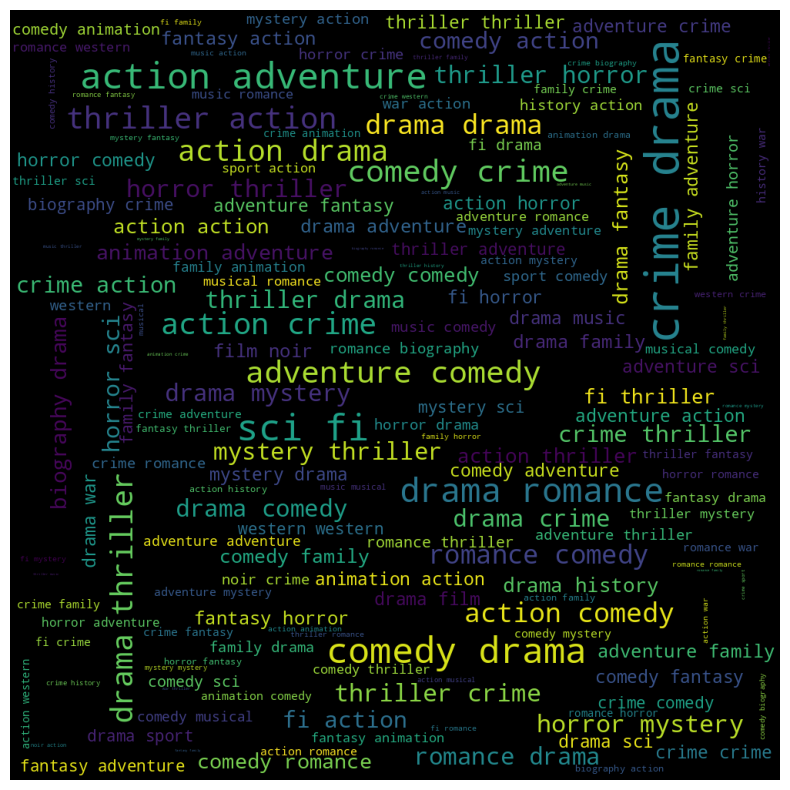

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update([',', ';', '!', '?', '.', '(', ')', '$', '#', '+', ':', '...', ' '])

words = df_raw['Genres'].apply(nltk.word_tokenize)
word = []
for i in words:
    word.extend(i)

word = pd.Series(word)
word = [i for i in word.str.lower() if i not in stop_words]

wc = WordCloud(background_color="black", max_words=2000, stopwords=stop_words, max_font_size=60, width=1000, height=1000)
wc.generate(" ".join(word))

plt.subplots(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#**Bubble Chart Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'year' column to string
df_raw['year'] = df_raw['year'].astype(str)

# Example cleaning of 'year' column to extract numerical values
df_raw['year'] = df_raw['year'].str.replace(r'\D', '', regex=True)  # Remove non-numeric characters
df_raw['year'] = df_raw['year'].replace('', np.nan)  # Replace empty values with NaN
df_raw['year'] = df_raw['year'].astype(float)  # Convert to float


In [ ]:
df_raw.isna().sum()

movie title                0
Box_Office_Collection      0
Rating                     0
User Rating                0
Genres                     0
Overview                   0
Plot Keyword               0
Director                   0
Top 5 Casts                0
Writer                     0
year                     189
path                       0
dtype: int64

In [ ]:
df_raw.dropna(subset=['Rating'], inplace=True)
df_raw = df_raw[df_raw['Rating'] != 'no-rating']

In [ ]:
df_new = df_raw.sort_values(by = 'Rating', ascending = False).head(200)

In [ ]:
df_new.head(5)

,movie title,Box_Office_Collection,Rating,User Rating,Genres,Overview,Plot Keyword,Director,Top 5 Casts,Writer,year,path
4453,Pinpoint,1 hour 39 minutes,9.9,25,"['Action', 'Adventure']","After discovering John Mosby's ancient, hidden...",[],Nathan Staley,"['Nathan Staley', 'Jake VonSeldeneck', 'Neil B...",Logan Kramer,2022.0,/title/tt17043084/
6172,Memory Lane,not-released,9.9,12,"['Action', 'Adventure', 'Music']",This time travel music adventure follows Arcad...,[],Ross Holman,"['Bianca Holman', 'Ross Holman', 'Steven Wilki...",Ross Holman,2022.0,/title/tt20865464/
24184,Vaaitha,not-released,9.8,43,"['Crime', 'Drama']",A poor Laundry worker gets injured in a road a...,"['justice', 'law']",Mahivarman.cs,"['Powlen Jessica', 'Athan Kumar', 'Pugal Mahen...",Mahivarman.cs,2022.0,/title/tt15848010/
4942,Son of Alibaba Nalpathonnaman,not-released,9.8,17,"['Action', 'Crime', 'Thriller']","Set in Kunnamkulam, a series of thefts takes p...",['police'],Najeebali,"['Aliyar', 'Aniyappan', 'Bineesh Bastin', 'Naj...",VV Vinayan,2022.0,/title/tt11100764/
17787,Tutankhamun: Enter the Tomb,not-released,9.7,12,"['Adventure', 'History']",Tutankhamun: Enter the Tomb,[],Joel Newton,"['Gabriel Gavigan', 'Hugh Bonneville', 'Joel N...",Bart Gavigan,2019.0,/title/tt11384560/


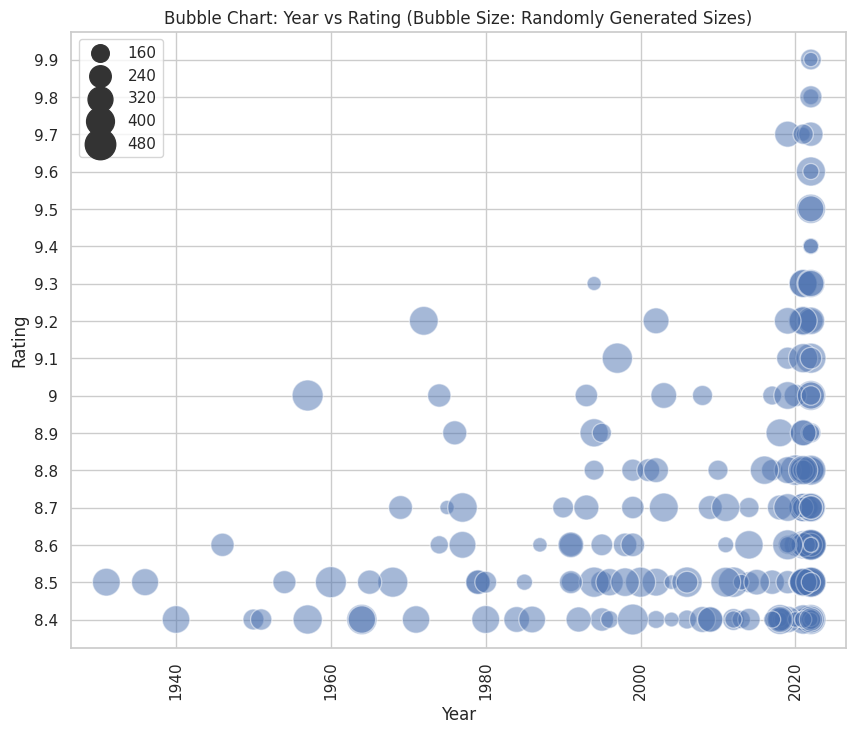

In [ ]:
# Ensure 'sizes' aligns with 'x' and 'y' length
sizes = np.random.randint(100, 500, size=len(df_new))

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_new, x='year', y='Rating', size=sizes, sizes=(100, 500), alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Bubble Chart: Year vs Rating (Bubble Size: Randomly Generated Sizes)')
plt.xticks(rotation=90)
plt.show()

----
#**Data Cleaning Tasks:**

1. Change the name of column names. For compatibility purposes, the spaces between words in column names are replaced with 'underscores' and spelling errors are corrected.

In [ ]:
df_raw.columns = df_raw.columns.str.replace(' ','_')    # Replace space with underscore
df_raw.columns = df_raw.columns.str.lower()             # Lower case

In [ ]:
df_raw = df_raw.rename(columns = {'generes': 'genres',
                                  'plot_kyeword': 'plot_keyword'
                                  })

In [ ]:
df_raw.head(3)

,movie_title,run_time,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
df_raw.tail(3)

,movie_title,run_time,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
24399,Bullwhip,not-released,5.1,398,"['Crime', 'Romance', 'Western']","In order to avoid the hangman's noose, a cowbo...","['taming of the shrew', 'fur trader', 'busines...",Harmon Jones,"['Guy Madison', 'Rhonda Fleming', 'James Griff...",Adele Buffington,-1958,/title/tt0051438/
24400,The Freshman,1 hour 42 minutes,6.4,20K,"['Comedy', 'Crime']",An N.Y.C. film school student accepts a job wi...,"['endangered species', 'fish out of water', 'g...",Andrew Bergman,"['Marlon Brando', 'Matthew Broderick', 'Bruno ...",Andrew Bergman,-1990,/title/tt0099615/
24401,Guys and Dolls,"$5,500,000 (estimated)",7.1,18K,"['Comedy', 'Crime', 'Musical']","In New York, a gambler is challenged to take a...","['mission', 'gambler', 'new york city', 'based...",Joseph L. Mankiewicz,"['Abe Burrows', 'Damon Runyon', 'Marlon Brando...",Jo Swerling,-1955,/title/tt0048140/


#**Column movie_title**

In [ ]:
print(df_raw['movie_title'])

0              Top Gun: Maverick
1        Jurassic World Dominion
2                        Top Gun
3                      Lightyear
4                     Spiderhead
                  ...           
24397               Delicatessen
24398                  Bitch Ass
24399                   Bullwhip
24400               The Freshman
24401             Guys and Dolls
Name: movie_title, Length: 24402, dtype: object


In [ ]:
print(df_raw['movie_title'].nunique())

23922


#**Column run_time**

In [ ]:
print(df_raw['run_time'].head(10))

0    $170,000,000 (estimated)
1          2 hours 27 minutes
2     $15,000,000 (estimated)
3                 $71,101,257
4                not-released
5          2 hours 19 minutes
6                not-released
7           1 hour 30 minutes
8                not-released
9     $60,000,000 (estimated)
Name: run_time, dtype: object


In [ ]:
# Count the number of rows in 'run_time' that have dollar symbol in them.
dollar_count = df_raw['run_time'].str.contains('\$').sum()
print(dollar_count)

4394


In [ ]:
# Count the number of rows in 'run_time' that have 'hours' or 'minutes' in them.
hours_minute_count = (df_raw['run_time'].str.contains('minutes|minute|hour|hours', case = False, na = False)).sum()
print(hours_minute_count)

11335


In [ ]:
# Count the number of rows in 'run_time' that have 'not-released' in them.
not_released_count = df_raw['run_time'].str.contains('not-released').sum()
print(not_released_count)

8475


The column 'run_type' has known 3 different kinds of data. For the remaining kinds of data in the dataframe, we will run a code through the series that is going to filter that ones that don't have any of the formers.

In [ ]:
print(df_raw.shape[0] - (dollar_count + hours_minute_count + not_released_count))

198


In [ ]:
df_run_time = df_raw.loc[0: ,'run_time']

In [ ]:
df_run_time

0          $170,000,000 (estimated)
1                2 hours 27 minutes
2           $15,000,000 (estimated)
3                       $71,101,257
4                      not-released
                    ...            
24397    FRF 24,000,000 (estimated)
24398                  not-released
24399                  not-released
24400             1 hour 42 minutes
24401        $5,500,000 (estimated)
Name: run_time, Length: 24402, dtype: object

In [ ]:
df_run_time.shape[0]

24402

In [ ]:
filtered_runtime = df_run_time[~df_run_time.str.contains(r'\$|not-released|minutes|minute|hours|hour', case = False, na = False)]
filtered_runtime

111              MVR 20 (estimated)
319          £8,000,000 (estimated)
366            £960,000 (estimated)
555         €30,690,000 (estimated)
642          £4,000,000 (estimated)
                    ...            
24003        €9,200,000 (estimated)
24250          £320,000 (estimated)
24279                         Color
24331                         Color
24397    FRF 24,000,000 (estimated)
Name: run_time, Length: 198, dtype: object

In [ ]:
foreign_currency = df_raw['run_time'].str.contains('\£|FRF|€').sum()
print(foreign_currency)

116


In [ ]:
filtered_runtime = df_run_time[~df_run_time.str.contains(r'\$|not-released|minutes|minute|hours|hour|\£|FRF|€', case = False, na = False)]
filtered_runtime

111              MVR 20 (estimated)
719      ₹1,350,000,000 (estimated)
767      ¥1,100,000,000 (estimated)
848        ¥330,000,000 (estimated)
889      ₹2,500,000,000 (estimated)
                    ...            
21566    DKK 39,000,000 (estimated)
22405    DEM 12,000,000 (estimated)
22924    SEK 32,000,000 (estimated)
24279                         Color
24331                         Color
Name: run_time, Length: 82, dtype: object

Except the three different types of data in 'run_type' column, the remaining can be deleted because there is not much that can be done about them.

In [ ]:
df_raw = df_raw[df_raw.run_time.str.contains(r'\$|not-released|minutes|minute|hours|hour', case = False, na = False)]

Since there are three different types of datas in the same column, we can separate them in three different columns.

1. Datas with the dollar sign in them are probably 'Budget' of the movie, so we can transfer them to a new column called 'movie_budget'.

2. Data with 'hours & minutes' in them are most probably run_time so, they can stay in the original column 'run_time'.

3. Data with 'not-released' are movies that are not yet in show, so we will keep them in a column called 'released' with binary indexing, ie. 1 for true value of released and 0 for false value.

For this purpose, we can xerox the whole column as two other column and name it accordingly, After, we can delete the specific irrevalent columns.

In [ ]:
df_raw.head(2)

,movie_title,run_time,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/


In [ ]:
df_raw.insert(2, 'movie_budget', df_raw['run_time'])

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)","$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)","$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
df_raw.insert(3, 'released', df_raw['run_time'])

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,"$170,000,000 (estimated)","$170,000,000 (estimated)","$170,000,000 (estimated)",8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,2 hours 27 minutes,2 hours 27 minutes,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,"$15,000,000 (estimated)","$15,000,000 (estimated)","$15,000,000 (estimated)",6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


Delete irrevelant row from these columns: *'movie_budget', 'run_time' , 'released'*

In [ ]:
# df_raw["movie_budget"] = df_raw["movie_budget"].str.replace(r"hour|hours|minute|minutes|not-released", "0")
# df_raw["run_time"] = df_raw['run_time'].str.replace(r"$|not-released", "0")
# df_raw["released"] = df_raw['released'].str.replace(r"$|hour|hours|minute|minutes","released")

In [ ]:
df_raw.loc[~df_raw['movie_budget'].str.contains('\$', regex=True), 'movie_budget'] = pd.NA
df_raw.loc[~df_raw['run_time'].str.contains(r'hour|hours|minute|minutes', regex = True), 'run_time'] = pd.NA
df_raw.loc[~df_raw['released'].str.contains(r'not-released', regex = True), 'released'] = pd.NA

In [ ]:
df_raw.head(5)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,<NA>,"$170,000,000 (estimated)",<NA>,8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,2 hours 27 minutes,<NA>,<NA>,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,<NA>,"$15,000,000 (estimated)",<NA>,6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,<NA>,"$71,101,257",<NA>,5.2,32K,"['Animation', 'Action', 'Adventure']",While spending years attempting to return home...,"['galaxy', 'spaceship', 'robot', 'rocket', 'sp...",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Ev...",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,<NA>,<NA>,not-released,5.4,23K,"['Action', 'Crime', 'Drama']","In the near future, convicts are offered the c...","['discover', 'medical', 'test', 'reality', 'fi...",Joseph Kosinski,"['Rhett Reese', 'Paul Wernick', 'Chris Hemswor...",George Saunders,-2022,/title/tt9783600/


Converting the times in run_times from hours/minutes format to minutes.

In [ ]:
df_raw['run_time'] = df_raw['run_time'].str.extract(r'(\d+) hour').astype(float) * 60 + df_raw['run_time'].str.extract(r'(\d+) minute').astype(float)

In [ ]:
type(df_raw.loc[7, 'run_time'])

numpy.float64

In [ ]:
df_raw.head(4)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,NaN,"$170,000,000 (estimated)",<NA>,8.6,187K,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,<NA>,<NA>,6,56K,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,NaN,"$15,000,000 (estimated)",<NA>,6.9,380K,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,NaN,"$71,101,257",<NA>,5.2,32K,"['Animation', 'Action', 'Adventure']",While spending years attempting to return home...,"['galaxy', 'spaceship', 'robot', 'rocket', 'sp...",Angus MacLane,"['Jason Headley', 'Matthew Aldrich', 'Chris Ev...",Angus MacLane,-2022,/title/tt10298810/


----
#**Column: movie_budget**

In [ ]:
print(df_raw.movie_budget.unique())

['$170,000,000 (estimated)' <NA> '$15,000,000 (estimated)' ... '$70,845'
 '$32,886,940' '$28,061,343']


In [ ]:
df_raw['movie_budget'] = pd.to_numeric(df_raw['movie_budget'].str.replace('[^\d]', '', regex = True), errors = 'coerce').astype(float).astype('Int64')

In [ ]:
print(df_raw.movie_budget.unique())

<IntegerArray>
[170000000,      <NA>,  15000000,  71101257,  60000000,  63000000, 200000000,
 250000000, 369345583, 150000000,
 ...
   5123000,      1189,     89442,    544472,    148505,     64227,    180974,
     70845,  32886940,  28061343]
Length: 1194, dtype: Int64


In [ ]:
print(df_raw.movie_budget.nunique())

1193


----
#**Column: released**

In [ ]:
df_raw = df_raw.reset_index(drop = True)

In [ ]:
for i in range(len(df_raw)):
  if pd.notna(df_raw.loc[i, 'released']):
    df_raw.loc[i, 'released'] = 1 if df_raw.loc[i, 'released'] != 'not-released' else 0

In [ ]:
df_raw['released'] = pd.to_numeric(df_raw['released'], errors = 'coerce').abs()

In [ ]:
df_raw.fillna(0, inplace = True)

In [ ]:
df_raw.released.info()

<class 'pandas.core.series.Series'>
RangeIndex: 24204 entries, 0 to 24203
Series name: released
Non-Null Count  Dtype  
--------------  -----  
24204 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


----
#**Column: Rating(Target)**

Changing the datatype of 'rating' to float

In [ ]:
df_raw['rating'] = pd.to_numeric(df_raw['rating'], errors='coerce')

In [ ]:
df_raw.rating.info()

<class 'pandas.core.series.Series'>
RangeIndex: 24204 entries, 0 to 24203
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
22470 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


In [ ]:
df_raw.rating.isna().sum()

1734

Since, these are the important 'Target' Feature, leaving these here might get us into problem during machine learning. The best approach is to delete these null values.

In [ ]:
df_raw.dropna(subset = 'rating', inplace = True)

In [ ]:
df_raw = df_raw.reset_index(drop = True)

----
#**Column: user_rating**

Changing the format of 'user_rating' to numerical float using a user-defined function for ease of working.

In [ ]:
def convert_knm_format_to_numeric(knm_format):
    if pd.notna(knm_format):
        if 'K' in knm_format:
          return float(knm_format.replace('K', '')) * 1000
        elif 'M' in knm_format:
          return float(knm_format.replace('M', '')) * 1,000,000
        else:
            return float(knm_format)
    else:
        return pd.NA

df_raw['user_rating'] = df_raw['user_rating'].apply(convert_knm_format_to_numeric)

In [ ]:
df_raw['user_rating'] = pd.to_numeric(df_raw['user_rating'], errors='coerce')

In [ ]:
df_raw.user_rating.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22470 entries, 0 to 22469
Series name: user_rating
Non-Null Count  Dtype  
--------------  -----  
22417 non-null  float64
dtypes: float64(1)
memory usage: 175.7 KB


In [ ]:
df_raw.user_rating.isna().sum()

53

The null value in these rows means that audience haven't left any comment for those movies.

In [ ]:
null_user_rating = df_raw[df_raw['user_rating'].isnull()]

We can just convert these null values to 0.

In [ ]:
df_raw['user_rating'] = df_raw['user_rating'].fillna(0)

In [ ]:
df_raw.user_rating.isna().sum()

0

----
#**Column: genres**

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
type(df_raw.loc[0, 'genres'])

str

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"['Action', 'Drama']",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"['Action', 'Adventure', 'Sci-Fi']",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"['Action', 'Drama']",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
df_raw['genres'] = df_raw['genres'].str.strip('[]')
df_raw['genres'] = df_raw['genres'].str.replace("'", "")
df_raw['genres'] = df_raw['genres'].str.replace(" ","")
df_raw['genres']=df_raw['genres'].str.split(',')

In [ ]:
print(df_raw.loc[0,'genres'])
print(type(df_raw.loc[0,'genres']))

['Action', 'Drama']
<class 'list'>


In [ ]:
df_raw.genres.head(5)

0                   [Action, Drama]
1       [Action, Adventure, Sci-Fi]
2                   [Action, Drama]
3    [Animation, Action, Adventure]
4            [Action, Crime, Drama]
Name: genres, dtype: object

----
#**Column: plot_keyword**

In [ ]:
df_raw.plot_keyword.head(5)

0    ['fighter jet', 'sequel', 'u.s. navy', 'fighte...
1    ['dinosaur', 'jurassic park', 'tyrannosaurus r...
2    ['pilot', 'male camaraderie', 'u.s. navy', 'gr...
3    ['galaxy', 'spaceship', 'robot', 'rocket', 'sp...
4    ['discover', 'medical', 'test', 'reality', 'fi...
Name: plot_keyword, dtype: object

In [ ]:
print(df_raw.loc[0, 'plot_keyword'])
print(type(df_raw.loc[0,'genres']))

['fighter jet', 'sequel', 'u.s. navy', 'fighter aircraft', 'pilot', 'naval aviation', 'jet fighter', 'military pilot', 'aviation', 'aircraft']
<class 'list'>


In [ ]:
df_raw.plot_keyword.head(5)

0    ['fighter jet', 'sequel', 'u.s. navy', 'fighte...
1    ['dinosaur', 'jurassic park', 'tyrannosaurus r...
2    ['pilot', 'male camaraderie', 'u.s. navy', 'gr...
3    ['galaxy', 'spaceship', 'robot', 'rocket', 'sp...
4    ['discover', 'medical', 'test', 'reality', 'fi...
Name: plot_keyword, dtype: object

----
#**Column: Director**

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"[Action, Drama]",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise',...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"[Action, Adventure, Sci-Fi]",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"['Colin Trevorrow', 'Derek Connolly', 'Chris P...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"[Action, Drama]",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', ...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
print(df_raw.director.nunique())
print(df_raw.director.unique())

10773
['Joseph Kosinski' 'Colin Trevorrow' 'Tony Scott' ... 'Scott Alexander'
 'Edward Killy' 'Bill Posley']


#**Column: top_5_casts**

In [ ]:
print(df_raw.top_5_casts.unique())
print(df_raw.top_5_casts.nunique())

["['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller']"
 "['Colin Trevorrow', 'Derek Connolly', 'Chris Pratt', 'Bryce Dallas Howard', 'Laura Dern']"
 "['Jack Epps Jr.', 'Ehud Yonay', 'Tom Cruise', 'Tim Robbins', 'Kelly McGillis']"
 ...
 "['Guy Madison', 'Rhonda Fleming', 'James Griffith', 'Harmon Jones', 'Adele Buffington']"
 "['Marlon Brando', 'Matthew Broderick', 'Bruno Kirby', 'Andrew Bergman', 'Andrew Bergman']"
 "['Abe Burrows', 'Damon Runyon', 'Marlon Brando', 'Jean Simmons', 'Frank Sinatra']"]
22426


In [ ]:
print(df_raw.loc[0, 'top_5_casts'])
print(type(df_raw.loc[0, 'top_5_casts']))

['Jack Epps Jr.', 'Peter Craig', 'Tom Cruise', 'Jennifer Connelly', 'Miles Teller']
<class 'str'>


In [ ]:
df_raw['top_5_casts'] = df_raw['top_5_casts'].str.strip('[]')
df_raw['top_5_casts'] = df_raw['top_5_casts'].str.replace("'","")
df_raw['top_5_casts']= df_raw['top_5_casts'].str.split(',')

In [ ]:
print(df_raw.loc[0, 'top_5_casts'])
print(type(df_raw.loc[0, 'top_5_casts']))

['Jack Epps Jr.', ' Peter Craig', ' Tom Cruise', ' Jennifer Connelly', ' Miles Teller']
<class 'list'>


In [ ]:
df_raw.head(5)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"[Action, Drama]",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"[Jack Epps Jr., Peter Craig, Tom Cruise, Je...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"[Action, Adventure, Sci-Fi]",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"[Colin Trevorrow, Derek Connolly, Chris Prat...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"[Action, Drama]",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"[Jack Epps Jr., Ehud Yonay, Tom Cruise, Tim...",Jim Cash,-1986,/title/tt0092099/
3,Lightyear,0.0,71101257,0.0,5.2,32000.0,"[Animation, Action, Adventure]",While spending years attempting to return home...,"['galaxy', 'spaceship', 'robot', 'rocket', 'sp...",Angus MacLane,"[Jason Headley, Matthew Aldrich, Chris Evans...",Angus MacLane,-2022,/title/tt10298810/
4,Spiderhead,0.0,0,0.0,5.4,23000.0,"[Action, Crime, Drama]","In the near future, convicts are offered the c...","['discover', 'medical', 'test', 'reality', 'fi...",Joseph Kosinski,"[Rhett Reese, Paul Wernick, Chris Hemsworth,...",George Saunders,-2022,/title/tt9783600/


In [ ]:
df_raw.run_time.unique()

array([  0., 147., 139.,  90., 142., 107., 175., 112.,  95., 122., 116.,
       108., 136.,  80., 114., 135., 150., 103., 100.,  93., 130., 128.,
       242., 168.,  92., 104., 118., 117., 115., 134., 110., 113., 123.,
        97., 132.,  99., 127., 121.,  98., 145., 140., 124.,  94., 101.,
       154.,  96., 119., 126., 144., 109.,  85., 105.,  89., 106.,  91.,
       131., 330.,  86., 137., 111., 129., 102., 152., 143., 182., 162.,
       149.,  84.,  75.,  82., 155., 179., 125.,  88., 161., 133.,  87.,
        79., 151.,  76., 247.,  74.,  81.,  83., 186., 163., 208., 158.,
       141., 138., 164., 220., 148., 173.,  78., 178., 160., 146., 153.,
       172., 171., 156., 213., 170., 174.,  73.,  70., 166.,  68., 176.,
       185., 263., 167.,  71.,  77., 177., 216., 188., 181., 165., 169.,
       159., 157., 202., 190.,  72., 199.,  66., 184.,  69., 195.,  62.,
       269.,  63., 193., 196., 224., 192., 260., 205., 212., 453., 200.,
       183., 210.,  67.,  61., 250.,  64.,  65., 22

----
#**Column: writer**

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year,path
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"[Action, Drama]",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"[Jack Epps Jr., Peter Craig, Tom Cruise, Je...",Jim Cash,-2022,/title/tt1745960/
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"[Action, Adventure, Sci-Fi]",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"[Colin Trevorrow, Derek Connolly, Chris Prat...",Emily Carmichael,-2022,/title/tt8041270/
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"[Action, Drama]",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"[Jack Epps Jr., Ehud Yonay, Tom Cruise, Tim...",Jim Cash,-1986,/title/tt0092099/


In [ ]:
df_raw.writer[:10]

0             Jim Cash
1     Emily Carmichael
2             Jim Cash
3        Angus MacLane
4      George Saunders
5     Daniel Scheinert
6       Matthew Reilly
7    Vasily Golovachov
8                 Sjón
9        Taika Waititi
Name: writer, dtype: object

In [ ]:
df_raw.writer.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22470 entries, 0 to 22469
Series name: writer
Non-Null Count  Dtype 
--------------  ----- 
22470 non-null  object
dtypes: object(1)
memory usage: 175.7+ KB


----
#**Column: year**

In [ ]:
df_raw.year[10: 20]

10    -2022
11    -2022
12    -1993
13    -2022
14    -2021
15    -2022
16    -2022
17    -2015
18    -2018
19    -2022
Name: year, dtype: object

In [ ]:
df_raw['year'] = pd.to_numeric(df_raw['year'], errors = 'coerce').abs()

In [ ]:
df_raw = df_raw.reset_index(drop = True)

In [ ]:
df_raw.year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22470 entries, 0 to 22469
Series name: year
Non-Null Count  Dtype  
--------------  -----  
21134 non-null  float64
dtypes: float64(1)
memory usage: 175.7 KB


In [ ]:
df_raw['year'] = df_raw['year'].fillna(0)

In [ ]:
df_raw['year'].unique()

array([2022., 1986., 1993., 2021., 2015., 2018.,    0., 1997., 1984.,
       2001., 1977., 2019., 2003., 1996., 1999., 2008., 2017., 2010.,
       2005., 1989., 2011., 1995., 2009., 2020., 2014., 2000., 2002.,
       1983., 2012., 2013., 1988., 2006., 2016., 1987., 2007., 1991.,
       2004., 1994., 1998., 1990., 1992., 1978., 1982., 1962., 1976.,
       1979., 1980., 1985., 1964., 1981., 1968., 1971., 1974., 1959.,
       1973., 1963., 1965., 1969., 1967., 1972., 1961., 1915., 1966.,
       1953., 1975., 1970., 1937., 1952., 1938., 1960., 1932., 1954.,
       1949., 1926., 1948., 1958., 1950., 1957., 1951., 1940., 1924.,
       1941., 1934., 1927., 1942., 1955., 1935., 1956., 1923., 1943.,
       1939., 1945., 1928., 1931., 1944., 1916., 1936., 2023., 1918.,
       1933., 1946., 1947., 1914., 1930., 1906., 1929., 1925., 1921.,
       1919., 1920., 1913., 2025., 1922.])

#**Column: path**

In [ ]:
df_raw.path[:10]

0     /title/tt1745960/
1     /title/tt8041270/
2     /title/tt0092099/
3    /title/tt10298810/
4     /title/tt9783600/
5     /title/tt6710474/
6    /title/tt14174940/
7    /title/tt14174940/
8    /title/tt11138512/
9    /title/tt10648342/
Name: path, dtype: object

Its not a necessary data, so we can drop the column.

In [ ]:
df_raw.drop('path', axis = 1, inplace = True)

In [ ]:
df_raw.head(3)

,movie_title,run_time,movie_budget,released,rating,user_rating,genres,overview,plot_keyword,director,top_5_casts,writer,year
0,Top Gun: Maverick,0.0,170000000,0.0,8.6,187000.0,"[Action, Drama]",After more than thirty years of service as one...,"['fighter jet', 'sequel', 'u.s. navy', 'fighte...",Joseph Kosinski,"[Jack Epps Jr., Peter Craig, Tom Cruise, Je...",Jim Cash,2022.0
1,Jurassic World Dominion,147.0,0,0.0,6.0,56000.0,"[Action, Adventure, Sci-Fi]",Four years after the destruction of Isla Nubla...,"['dinosaur', 'jurassic park', 'tyrannosaurus r...",Colin Trevorrow,"[Colin Trevorrow, Derek Connolly, Chris Prat...",Emily Carmichael,2022.0
2,Top Gun,0.0,15000000,0.0,6.9,380000.0,"[Action, Drama]",As students at the United States Navy's elite ...,"['pilot', 'male camaraderie', 'u.s. navy', 'gr...",Tony Scott,"[Jack Epps Jr., Ehud Yonay, Tom Cruise, Tim...",Jim Cash,1986.0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22470 entries, 0 to 22469
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   22470 non-null  object 
 1   run_time      22470 non-null  float64
 2   movie_budget  22470 non-null  Int64  
 3   released      22470 non-null  float64
 4   rating        22470 non-null  float64
 5   user_rating   22470 non-null  float64
 6   genres        22470 non-null  object 
 7   overview      22470 non-null  object 
 8   plot_keyword  22470 non-null  object 
 9   director      22470 non-null  object 
 10  top_5_casts   22470 non-null  object 
 11  writer        22470 non-null  object 
 12  year          22470 non-null  float64
dtypes: Int64(1), float64(5), object(7)
memory usage: 2.3+ MB


In [ ]:
df_raw.isna().sum()

movie_title     0
run_time        0
movie_budget    0
released        0
rating          0
user_rating     0
genres          0
overview        0
plot_keyword    0
director        0
top_5_casts     0
writer          0
year            0
dtype: int64

This cleaned data can be saved in a csv file so it can be futher assessed in EDA & Classification Part.

In [ ]:
df_raw.to_csv('Imdb_CleanData.csv', index = False)